In [1]:
!cd

In [2]:
#!pip install PyMySQL==1.0.0

In [3]:
import pymysql.cursors
# Connect to the database

In [4]:
# localhost or 127.0.0.0

In [5]:
connection = pymysql.connect(host='localhost',
        user='root',
        password='12345678',
        db='tip',
        charset='utf8',
        cursorclass=pymysql.cursors.DictCursor)

'''try:
    with connection.cursor() as cursor:
        # Read a single record
        #sql = "SELECT `id`, `password` FROM `users` WHERE `email`=%s"
        sql = "select * from tips where tips.day='';"
        #sql = "SELECT count(total_bill) FROM tip.tips where tip >= 7 ;"
        cursor.execute(sql)
        result = cursor.fetchall()
        print(result)
finally:
    connection.close()'''

'try:\n    with connection.cursor() as cursor:\n        # Read a single record\n        #sql = "SELECT `id`, `password` FROM `users` WHERE `email`=%s"\n        sql = "select * from tips where tips.day=\'\';"\n        #sql = "SELECT count(total_bill) FROM tip.tips where tip >= 7 ;"\n        cursor.execute(sql)\n        result = cursor.fetchall()\n        print(result)\nfinally:\n    connection.close()'

In [6]:
import pymysql.cursors
import pandas as pd

In [7]:
# MySQL DB에서 데이터 받아와서 DataFrame에 저장

conn = pymysql.connect(host='localhost', user='root', 
                       password='12345678', db='tip', charset='utf8',
                       autocommit=True, cursorclass=pymysql.cursors.DictCursor)
try:

   with conn.cursor() as curs:
      sql = "select * from tip.tips;"
      curs.execute(sql)
      rs = curs.fetchall()

      # DB에서 받아온 값을 DataFrame에 넣음

      df = pd.DataFrame(rs)
      print(df)
    
    #df.to_csv('query.csv')

finally:

   conn.close()

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2
244       20.34  4.00    None     No  None  Dinner     3

[245 rows x 7 columns]


In [8]:
df.isnull().sum()

total_bill    0
tip           0
sex           1
smoker        0
day           1
time          0
size          0
dtype: int64

In [9]:
df['sex'].replace({'Female':0,'Male':1}, inplace=True)
df['smoker'].replace({"No" : 0, "Yes" : 1}, inplace=True)
df['day'].replace({"Thur" : 0, "Fri" : 1, "Sat" : 2, "Sun" : 3}, inplace=True)
df['time'].replace({"Lunch" : 0, "Dinner" : 1}, inplace=True)

In [10]:
import numpy as np

In [11]:
df.replace('',np.nan,inplace=True) # ''-> np.nan

In [12]:
#df=df.drop('day', axis =1) #독립변인들의 value값만 추출

In [13]:
df.isnull().sum()

total_bill    0
tip           0
sex           1
smoker        0
day           1
time          0
size          0
dtype: int64

In [14]:
df.describe()

,total_bill,tip,sex,smoker,day,time,size
count,245.000000,245.000000,244.000000,245.000000,244.000000,245.000000,245.000000
mean,19.788204,3.002367,0.643443,0.379592,1.725410,0.722449,2.571429
std,8.884221,1.382282,0.479967,0.486279,1.155774,0.448707,0.949547
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.370000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,17.810000,2.920000,1.000000,0.000000,2.000000,1.000000,2.000000
75%,24.080000,3.600000,1.000000,1.000000,3.000000,1.000000,3.000000
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  245 non-null    float64
 1   tip         245 non-null    float64
 2   sex         244 non-null    float64
 3   smoker      245 non-null    int64  
 4   day         244 non-null    float64
 5   time        245 non-null    int64  
 6   size        245 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 13.5 KB


In [16]:
type(df)

pandas.core.frame.DataFrame

In [17]:
#import numpy as np
from sklearn.impute import SimpleImputer

In [18]:
data=df.values

In [19]:
y=df['total_bill']

In [20]:
X=df.drop('total_bill', axis=1)

In [21]:
X.describe()

,tip,sex,smoker,day,time,size
count,245.000000,244.000000,245.000000,244.000000,245.000000,245.000000
mean,3.002367,0.643443,0.379592,1.725410,0.722449,2.571429
std,1.382282,0.479967,0.486279,1.155774,0.448707,0.949547
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2.920000,1.000000,0.000000,2.000000,1.000000,2.000000
75%,3.600000,1.000000,1.000000,3.000000,1.000000,3.000000
max,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000


In [22]:
y.describe()

count    245.000000
mean      19.788204
std        8.884221
min        3.070000
25%       13.370000
50%       17.810000
75%       24.080000
max       50.810000
Name: total_bill, dtype: float64

In [23]:
data.shape

(245, 7)

In [24]:
data=X.values

In [25]:
y=y.values

In [26]:
data[:,5]

array([2., 3., 3., 2., 4., 4., 2., 4., 2., 2., 2., 4., 2., 4., 2., 2., 3.,
       3., 3., 3., 2., 2., 2., 4., 2., 4., 2., 2., 2., 2., 2., 4., 2., 4.,
       2., 3., 3., 3., 3., 3., 3., 2., 2., 2., 4., 2., 2., 4., 3., 2., 2.,
       2., 4., 2., 4., 2., 4., 2., 2., 4., 2., 2., 2., 4., 3., 3., 2., 1.,
       2., 2., 2., 3., 2., 2., 2., 2., 2., 4., 2., 2., 2., 2., 1., 2., 2.,
       4., 2., 2., 2., 2., 2., 2., 2., 2., 2., 4., 2., 2., 2., 2., 2., 2.,
       3., 2., 2., 2., 2., 2., 2., 2., 2., 1., 3., 2., 3., 2., 4., 2., 2.,
       4., 2., 2., 2., 2., 2., 6., 2., 2., 2., 3., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 6., 5., 6., 2., 2., 3., 2., 2., 2., 2., 2., 3.,
       4., 4., 5., 6., 4., 2., 4., 4., 2., 3., 2., 2., 3., 2., 4., 2., 2.,
       3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 4., 2., 3., 4., 2., 5., 3.,
       5., 3., 3., 2., 2., 2., 2., 2., 2., 2., 4., 2., 2., 3., 2., 2., 2.,
       4., 3., 3., 4., 2., 2., 3., 4., 4., 2., 3., 2., 5., 2., 2., 4., 2.,
       2., 1., 3., 2., 2.

In [27]:
sum(np.isnan(data).flatten())

2

In [28]:
sum(np.isnan(y).flatten())

0

In [29]:
imputer = SimpleImputer(strategy='median')

In [30]:
imputer.fit(data)

SimpleImputer(strategy='median')

In [33]:
data_trans = imputer.transform(data)

In [34]:
#df['total_bill'].hist()

**REF**

In [37]:
from sklearn.feature_selection import RFE

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
from sklearn.svm import SVR

In [40]:
estimator = SVR(kernel='linear')

In [41]:
rfe = RFE(estimator, n_features_to_select=4)

In [42]:
selector=rfe.fit(data_trans, y)


In [43]:
selector.support_

array([ True, False,  True, False,  True,  True])

In [44]:
# summarize all features
for i in range(data_trans.shape[1]):
  print('Column: %d,  Rank: %d' % (i,  rfe.ranking_[i]))

Column: 0,  Rank: 1
Column: 1,  Rank: 3
Column: 2,  Rank: 1
Column: 3,  Rank: 2
Column: 4,  Rank: 1
Column: 5,  Rank: 1


In [45]:
df1=pd.DataFrame(data_trans)

In [46]:
df1

,0,1,2,3,4,5
0,1.01,0.0,0.0,3.0,1.0,2.0
1,1.66,1.0,0.0,3.0,1.0,3.0
2,3.50,1.0,0.0,3.0,1.0,3.0
3,3.31,1.0,0.0,3.0,1.0,2.0
4,3.61,0.0,0.0,3.0,1.0,4.0
...,...,...,...,...,...,...
240,2.00,0.0,1.0,2.0,1.0,2.0
241,2.00,1.0,1.0,2.0,1.0,2.0
242,1.75,1.0,0.0,2.0,1.0,2.0
243,3.00,0.0,0.0,0.0,1.0,2.0


In [47]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [49]:
# df_trans  # 에러

NameError: name 'df_trans' is not defined

In [50]:
df. total_bill

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
240    27.18
241    22.67
242    17.82
243    18.78
244    20.34
Name: total_bill, Length: 245, dtype: float64

In [51]:
df['total_bill']

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
240    27.18
241    22.67
242    17.82
243    18.78
244    20.34
Name: total_bill, Length: 245, dtype: float64

<AxesSubplot:>

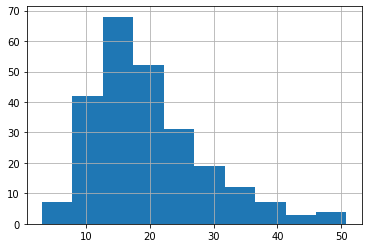

In [52]:
df['total_bill'].hist()

**MinMaxScaler**

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
trans = MinMaxScaler()

In [56]:
data.shape

(245, 6)

In [57]:
X_norm = trans.fit_transform(data)

In [60]:
df_norm = pd.DataFrame(X_norm)

In [62]:
df_norm.describe()

,0,1,2,3,4,5
count,245.000000,244.000000,245.000000,244.000000,245.000000,245.000000
mean,0.222485,0.643443,0.379592,0.575137,0.722449,0.314286
std,0.153587,0.479967,0.486279,0.385258,0.448707,0.189909
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.000000,0.000000,0.200000
50%,0.213333,1.000000,0.000000,0.666667,1.000000,0.200000
75%,0.288889,1.000000,1.000000,1.000000,1.000000,0.400000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
df.describe()

,total_bill,tip,sex,smoker,day,time,size
count,245.000000,245.000000,244.000000,245.000000,244.000000,245.000000,245.000000
mean,19.788204,3.002367,0.643443,0.379592,1.725410,0.722449,2.571429
std,8.884221,1.382282,0.479967,0.486279,1.155774,0.448707,0.949547
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.370000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,17.810000,2.920000,1.000000,0.000000,2.000000,1.000000,2.000000
75%,24.080000,3.600000,1.000000,1.000000,3.000000,1.000000,3.000000
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000


**StandardScaler**

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
sc=StandardScaler()

In [67]:
df_sc=sc.fit_transform(data)

In [68]:
df_trsfrom_sc=pd.DataFrame(df_sc)

In [69]:
df_trsfrom_sc.describe().round()

,0,1,2,3,4,5
count,245.0,244.0,245.0,244.0,245.0,245.0
mean,0.0,-0.0,-0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0
25%,-1.0,-1.0,-1.0,-1.0,-2.0,-1.0
50%,-0.0,1.0,-1.0,0.0,1.0,-1.0
75%,0.0,1.0,1.0,1.0,1.0,0.0
max,5.0,1.0,1.0,1.0,1.0,4.0


In [70]:
data

array([[1.01, 0.  , 0.  , 3.  , 1.  , 2.  ],
       [1.66, 1.  , 0.  , 3.  , 1.  , 3.  ],
       [3.5 , 1.  , 0.  , 3.  , 1.  , 3.  ],
       ...,
       [1.75, 1.  , 0.  , 2.  , 1.  , 2.  ],
       [3.  , 0.  , 0.  , 0.  , 1.  , 2.  ],
       [4.  ,  nan, 0.  ,  nan, 1.  , 3.  ]])

**PCA**

In [71]:
from sklearn.decomposition import PCA

In [72]:
data_trans.shape

(245, 6)

In [73]:
trans = PCA(n_components=4) #주성분을 몇개로 할지 결정

In [74]:
X_dim = trans.fit_transform(data_trans)

In [75]:
print(X_dim[:3, :])

[[-1.51524816 -1.86950745  0.29215756 -0.47390072]
 [-0.4913902  -1.66136096  0.90729883 -0.20147596]
 [ 1.05519485 -1.04185307  0.13436856 -0.31179314]]


**Regression Feature Selection**

In [79]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regress

ImportError: cannot import name 'f_regress' from 'sklearn.feature_selection' (/Users/kimboa/opt/anaconda3/envs/multi/lib/python3.7/site-packages/sklearn/feature_selection/__init__.py)

In [77]:
fs = SelectKBest(score_func=f_regression, k=4)


NameError: name 'f_regression' is not defined

In [ ]:
data_trans.shape


In [ ]:
y.shape

In [ ]:
X_selected = fs.fit_transform(data_trans, y)

In [ ]:
print(X_selected.shape)

In [37]:
# 새출발

In [38]:
import pymysql.cursors
import pandas as pd

In [39]:
sql="select customers.state, customers.customerName, payments.checkNumber from customers LEFT JOIN payments on customers.customerNumber = payments.customerNumber where payments.paymentDate >= '2004-10-06';"

In [ ]:
!cd

In [ ]:
df.to_csv('query_car.csv')